DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

DBSCAN is a clustering method that is useful for identifying clusters of irregular shapes. It does so by definig clusters as high-density areas surrounded by space. It uses to key hyperparameters, epsilon and min_samples to define what is considered a high-density area. A point is selected and number of points within the distance, epsilon, is calculated. If the number of surrounding points, neighbours, is greater than or equal to min_sample then this point is considered a core sample. If a coresample is identified the cluster is extended by incorporating neighbours that are also core samples. This is repeated until non-core samples are reach. These are samples that are considered neighbours of a core sample but are, themselves, surrenders by less than min_sample neighbors. The non-core samples will be into the cluster but will not be used to extend the cluster further.  The algorithm  will then move on to find others points another section that may be core points for another cluster. If there exsists a point that can be part of two clusters based on its neighbours, the algorithmn wil assign it to the first cluster.

Any point that is not the neighbour of a core sample is considered an outlier. Tuning min_samples allows  the algorithmn to handle noise. Epsilon usually cannot be let at it's default value and must be determined for each dataset.

This method is partic

Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

Apply Clustering Algorithmns to make_moons data. This highlights DBSCAN's ability to handle irregalurly shaped clusters

c:\Users\ruths\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ruths\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ruths\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ruths\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

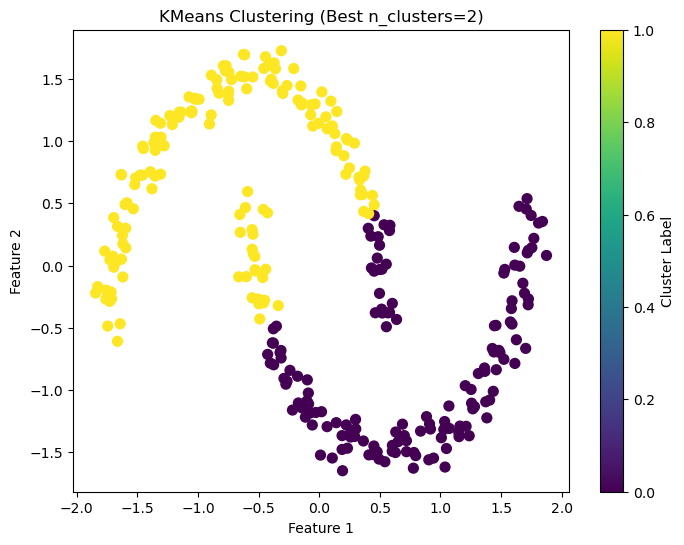

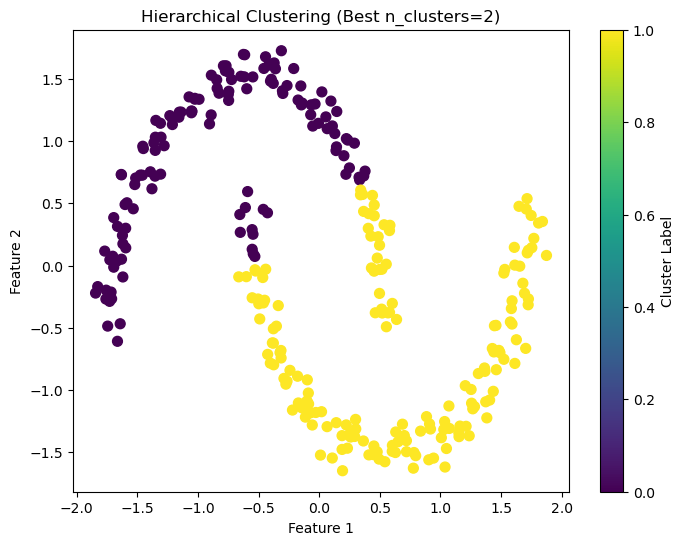

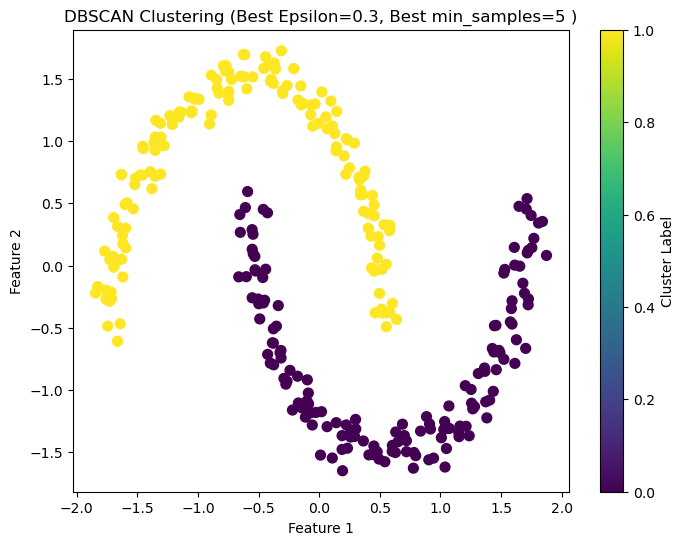

In [6]:
X_moons, _ = make_moons(n_samples=300, noise=0.05, random_state=42)
X_moons = StandardScaler().fit_transform(X_moons)  # Normalize data

#Grid search will be applied to find the best parameters each clustering algorithm

# Define parameter grids
param_grid_kmeans = {'n_clusters': [2, 3, 4, 5]}
param_grid_agg = {'n_clusters': [2, 3, 4, 5], 'linkage': ['ward', 'complete', 'average']}
param_grid_dbscan = {'eps': [0.1, 0.2, 0.3], 'min_samples': [5, 10, 15]}

# Perform grid search for agglomerative clustering
def custom_silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    return silhouette_score(X, labels)

# Perform grid search 
grid_search_kmeans = GridSearchCV(KMeans(random_state=42), param_grid_kmeans, cv=5, scoring=custom_silhouette_scorer)
grid_search_kmeans.fit(X_moons)
#plot the best KMeans clustering result
best_kmeans = grid_search_kmeans.best_estimator_ 
plt.figure(figsize=(8, 6))
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=best_kmeans.labels_, cmap='viridis', s=50)
plt.title(f'KMeans Clustering (Best n_clusters={grid_search_kmeans.best_params_["n_clusters"]})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')    
#For Agglomerative Clustering
grid_search_agg = GridSearchCV(AgglomerativeClustering(), param_grid_agg, cv=5, scoring=custom_silhouette_scorer)
grid_search_agg.fit(X_moons)
best_heircluster = grid_search_agg.best_estimator_ 
plt.figure(figsize=(8, 6))
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=best_heircluster.labels_, cmap='viridis', s=50)
plt.title(f'Hierarchical Clustering (Best n_clusters={grid_search_kmeans.best_params_["n_clusters"]})')
plt.xlabel('Feature 1') 
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')  

#for DBSCAN
grid_search_dbscan = GridSearchCV(DBSCAN(), param_grid_dbscan, cv=5, scoring=custom_silhouette_scorer)
grid_search_dbscan.fit(X_moons)
best_kmeans = grid_search_dbscan.best_estimator_ 
plt.figure(figsize=(8, 6))
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=best_kmeans.labels_, cmap='viridis', s=50)
plt.title(f'DBSCAN Clustering (Best Epsilon={grid_search_dbscan.best_params_["eps"]}, Best min_samples={grid_search_dbscan.best_params_["min_samples"]} )')
plt.xlabel('Feature 1') 
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')  

Apply For Make Blobs - Highlights DBSCAN's difficulty with high density data

c:\Users\ruths\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ruths\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ruths\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ruths\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

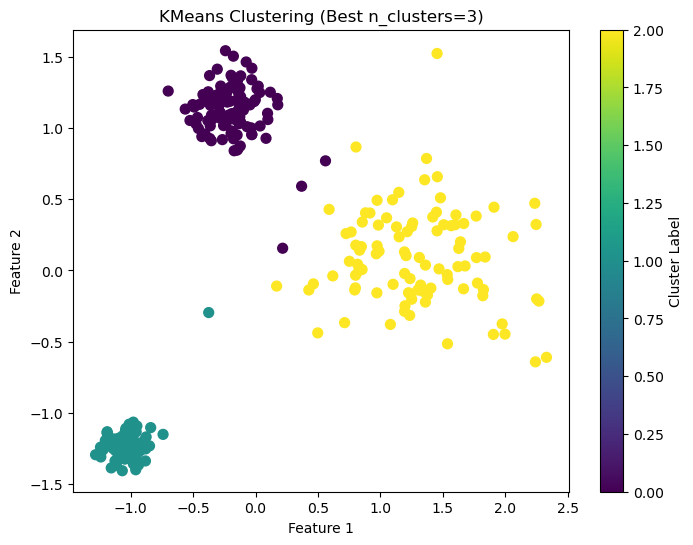

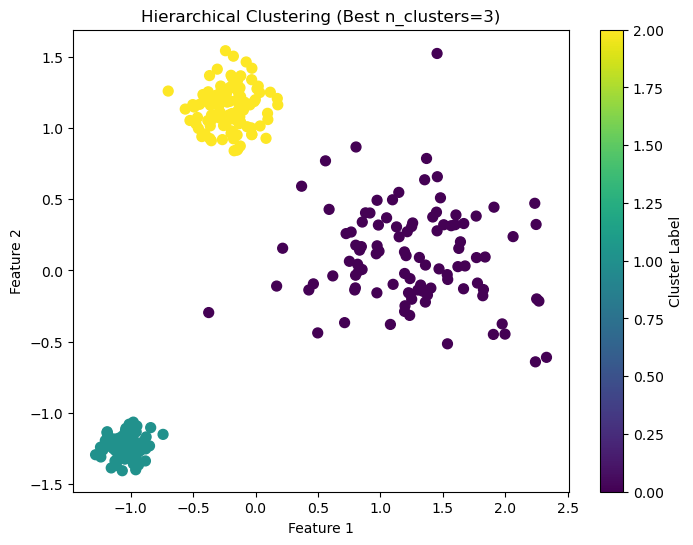

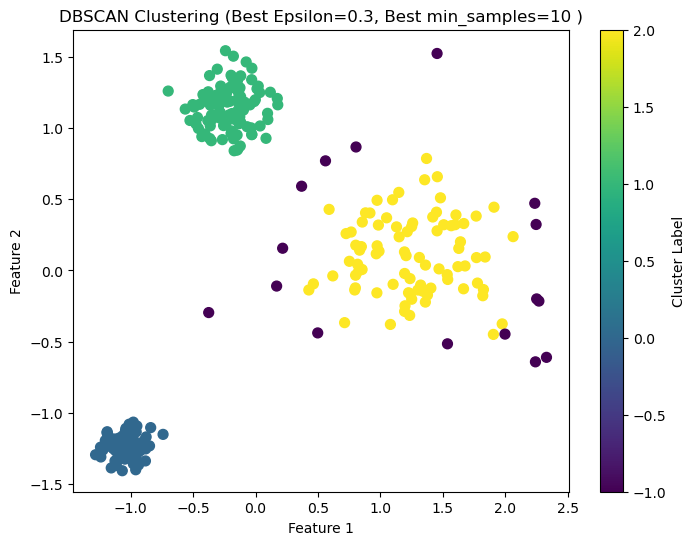

In [9]:
X_blobs, _ = make_blobs(n_samples=300, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=42)
X_blobs = StandardScaler().fit_transform(X_blobs)

# Define parameter grids
param_grid_kmeans = {'n_clusters': [2, 3, 4, 5]}
param_grid_agg = {'n_clusters': [2, 3, 4, 5], 'linkage': ['ward', 'complete', 'average']}
param_grid_dbscan = {'eps': [0.1, 0.2, 0.3], 'min_samples': [5, 10, 15]}

# Perform grid search for agglomerative clustering
def custom_silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    return silhouette_score(X, labels)

# Perform grid search 
grid_search_kmeans = GridSearchCV(KMeans(random_state=42), param_grid_kmeans, cv=5, scoring=custom_silhouette_scorer)
grid_search_kmeans.fit(X_blobs)
#plot the best KMeans clustering result
best_kmeans = grid_search_kmeans.best_estimator_ 
plt.figure(figsize=(8, 6))
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=best_kmeans.labels_, cmap='viridis', s=50)
plt.title(f'KMeans Clustering (Best n_clusters={grid_search_kmeans.best_params_["n_clusters"]})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')    
#For Agglomerative Clustering
grid_search_agg = GridSearchCV(AgglomerativeClustering(), param_grid_agg, cv=5, scoring=custom_silhouette_scorer)
grid_search_agg.fit(X_blobs)
best_heircluster = grid_search_agg.best_estimator_ 
plt.figure(figsize=(8, 6))
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=best_heircluster.labels_, cmap='viridis', s=50)
plt.title(f'Hierarchical Clustering (Best n_clusters={grid_search_kmeans.best_params_["n_clusters"]})')
plt.xlabel('Feature 1') 
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')  

#for DBSCAN
grid_search_dbscan = GridSearchCV(DBSCAN(), param_grid_dbscan, cv=5, scoring=custom_silhouette_scorer)
grid_search_dbscan.fit(X_blobs)
best_kmeans = grid_search_dbscan.best_estimator_ 
plt.figure(figsize=(8, 6))
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=best_kmeans.labels_, cmap='viridis', s=50)
plt.title(f'DBSCAN Clustering (Best Epsilon={grid_search_dbscan.best_params_["eps"]}, Best min_samples={grid_search_dbscan.best_params_["min_samples"]} )')
plt.xlabel('Feature 1') 
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')  